In [1]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco
import vns as vns

import random
import copy
from matplotlib import pyplot as plt

importing Jupyter notebook from GraphGenerator.ipynb
importing Jupyter notebook from BruteForce.ipynb
importing Jupyter notebook from BruteForceOptimized.ipynb
importing Jupyter notebook from AntColonyOptimized.ipynb
importing Jupyter notebook from vns.ipynb


In [2]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

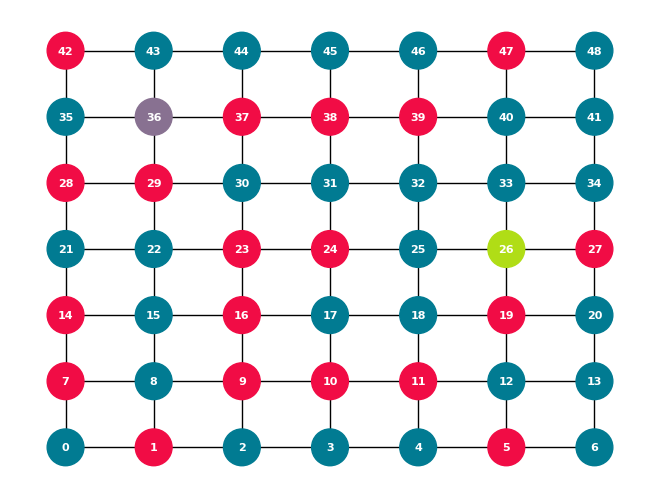

In [7]:
g, obstacles, start_pos, goal_pos = gg.build_grid(7)
obstacles_start = copy.deepcopy(obstacles)

In [8]:
num_iterations = 100
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 50
rho = 0.9

# Brute Force:

In [9]:
metrics_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 17 was found in iteration 98
Time it took to finish the search: 0.410627
Obstacles moved: ['5->12', '29->22', '42->35', '38->45', '12->15', '27->34', '15->0', '10->3', '23->31', '34->33', '33->34']
Best path of all iterations: ['36->29', '29->30', '30->31', '31->24', '24->25', '25->26']


# Optimized brute

In [10]:
obstacles = copy.deepcopy(obstacles_start)
metrics_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 10 was found in iteration 7
Time it took to finish the search: 0.026051
Obstacles moved: ['29->30', '38->31', '11->18', '10->3', '28->35', '5->6', '37->38', '27->34', '19->20', '24->25', '35->28', '23->22', '16->23', '22->29', '9->8', '47->40', '20->19', '31->32', '18->17', '1->2', '3->10', '42->43', '28->35', '38->31', '2->1', '8->15', '17->24', '25->18', '18->17', '7->0', '30->37', '17->16', '37->38', '14->7', '1->2', '32->33', '29->22', '35->42', '7->14', '22->21', '10->3', '14->7', '34->41', '33->34', '40->33', '41->40', '21->22', '39->46', '24->25', '7->8', '19->20', '16->17', '38->39', '23->30', '6->5', '40->47', '8->1', '39->38', '33->32', '42->35']
Best path of all iterations: [36, 29, 30, 31, 32, 33, 26]


# ACO

In [11]:
for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
metrics_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, num_iterations, theta, alpha, beta, obstacles)

Best score: 8
Time it took to finish the search: 0.447522
Obstacles moved: ['47->48', '29->22']
Best path: [36, 29, 30, 31, 32, 25, 26]


# VNS

In [12]:
obstacles = copy.deepcopy(obstacles_start)
vns_params = {
    'time_limit': 2,
    'k_min': 1,
    'k_max': 3,
    'move_prob': 0.1,
}
metrics_vns = vns.vns(g, start_pos, goal_pos, obstacles, vns_params, num_iters = num_iterations)
# print()
# result, result_value = vns.simulated_annealing(g, start_pos, goal_pos, obstacles, num_iters = 10000)

Best score: 7
Time it took to finish the search: 0.068271
Obstacles moved: ['37->44']
Best path: [36, 37, 30, 31, 32, 33, 26]


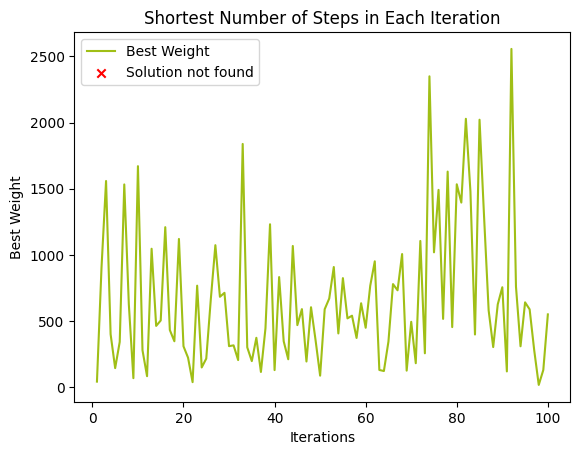

In [13]:
plot(num_iterations, metrics_bf["solution_values"])

In [14]:
# plot(num_iterations, metrics_bfo["solution_values"])

In [15]:
# plot(num_iterations, metrics_aco["solution_values"])

In [16]:
metrics = [metrics_bf, metrics_bfo, metrics_aco, metrics_vns]
name = ["bf", "bfo", "aco", "vns"]

In [17]:
def plot_solutions(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

In [18]:
best_values = [x["best_value"] for x in metrics]
times = [x["time"] for x in metrics]

In [19]:
def plot_metric(values, names, title):
    plt.figure(figsize=(14, 4))
    plt.bar(name, values)
    plt.grid(alpha = 0.5)
    
    for i, s in enumerate(values):
        plt.text(name[i], s, f'{s:.4f}', ha='center', va='bottom')
    
#     plt.ylim()
    plt.title(title)
    plt.show()

In [20]:
def plot_solutions(num_iterations):
    fig, axs = plt.subplots(2, 2, figsize = (10, 10))

    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    x = range(1, num_iterations+1)
    
    for i, ax in enumerate(axs.flat):
        # if i == 3:
        #     continue
            
        indices = [j for j, value in enumerate(metrics[i]["solution_values"]) if value == -1]
        ax.scatter([j+1 for j in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
            
        color = random.sample(colors, k=1)[0]
        ax.plot(x, metrics[i]["solution_values"], color = color,)
        ax.set_title(name[i])
    
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Best Weight')
        if len(indices):
            ax.legend()
    
    plt.show()

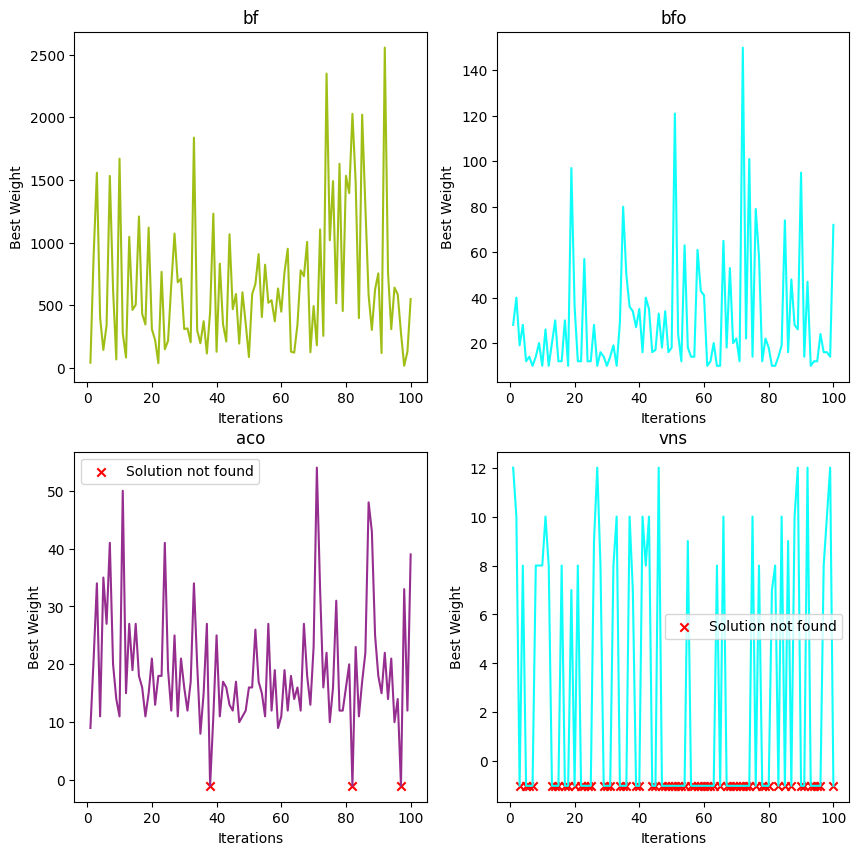

In [21]:
plot_solutions(num_iterations)

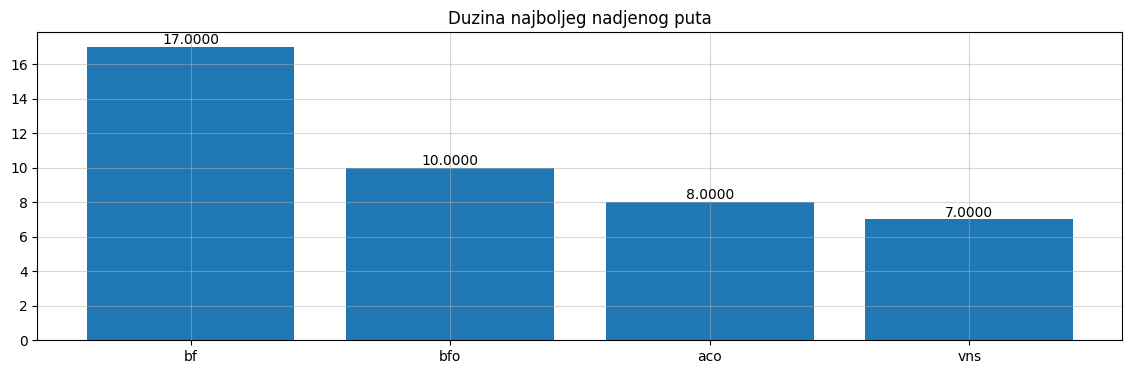

In [22]:
plot_metric(best_values, name, "Duzina najboljeg nadjenog puta")

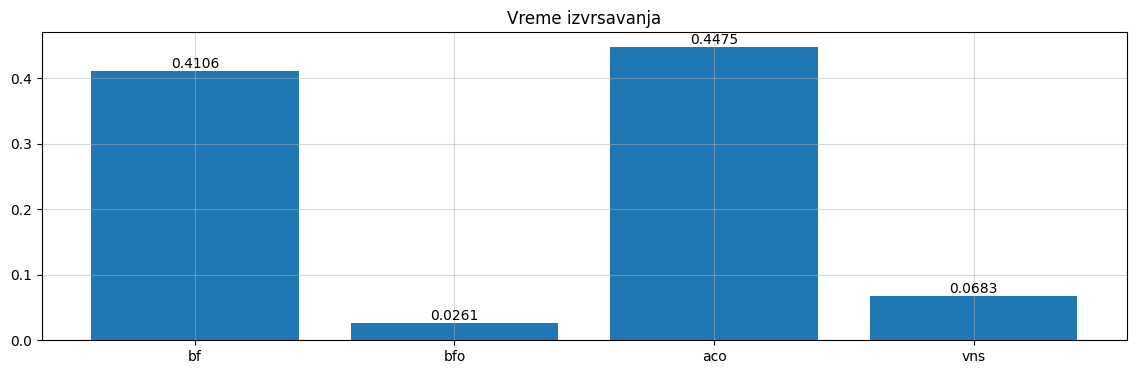

In [23]:
plot_metric(times, name, "Vreme izvrsavanja")

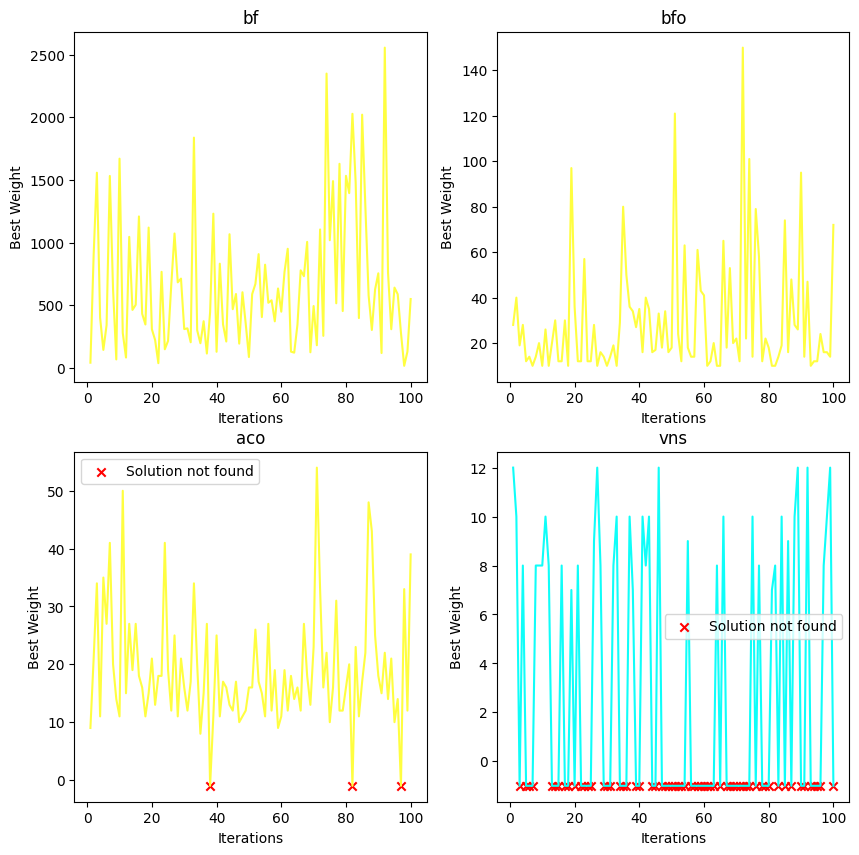

In [24]:
plot_solutions(num_iterations)